<a href="https://colab.research.google.com/github/SQuinn314/ODELectures/blob/main/Lecture_Predator_Prey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling the Predator Prey

The Predator-Prey Model (Also known as the Lotka-Volterra Model) studies two interacting populations.  If $x$ is the size of the predator population, and $y$ is the prey population, we can write the First Order System
$$ \begin{cases}x' = ax - b xy \\ y' = cxy - dy \end{cases}$$

We can view this as $x' = f(x,y)$ and $y' = g(x,y)$.

In [1]:
#Important Packages
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.close_figures=False # keep figures open in pyplot

from scipy.integrate import odeint, solve_ivp

In [2]:
# Adds a Vector Field to Axes.
def plot_VectorField(vf, vg, ax, 
                     left = 0,
                     right = 12.5, 
                     top = 12.5, 
                     bottom = 0,
                     scale = 5, 
                     width = 0.0015,
                     points=50): 
  #Create grid
  ax = ax or plt.gca()

  # First create list of points for the grid.
  # np.linspace(Left End Point, Right End Point, Number of Points)
  x = np.linspace(left, right, points)
  y = np.linspace(bottom, top, points)

  # This create an array of coordinates, with the given x coordinate and the given y coordinate.
  # They are repeated appropriately.
  X, Y = np.meshgrid(x, y)

  # Create a Quiver (Collection of direction vectors)
  u = vf(0, X, Y)
  v = vg(0, X,Y)

  # Normalize so everything is length 1.
  newu = u / np.sqrt(u**2 + v**2)
  newv = v / np.sqrt(u**2 + v**2)

  ax.quiver(
      x, y,           # Coordinates where there are arrows
      newu, newv,     # Directions of arrows
      angles = 'xy',  # Draws arrows from (x,y) to (x+u, y+v)
      scale_units='xy', scale= scale, width = .0015, # Arrow size settings 
      )
  return(ax)

# This function is used for the ODE solver, it uses f and g.
def dU_dt(U,t):
  x = U[0]
  y = U[1]
  xprime = f(t, x, y)
  yprime = g(t, x, y)
  return [xprime, yprime]

To create a vector field, we need the tangent vectors $T' = f(x,y) \vec{i} + g(x,y) \vec{j} = \langle f, g \rangle$.


In [3]:
def f(t, x, y):
  return a*x - b*x*y

def g(t, x, y):
  return c*x*y - d*y

vf = np.vectorize(f)
vg = np.vectorize(g)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


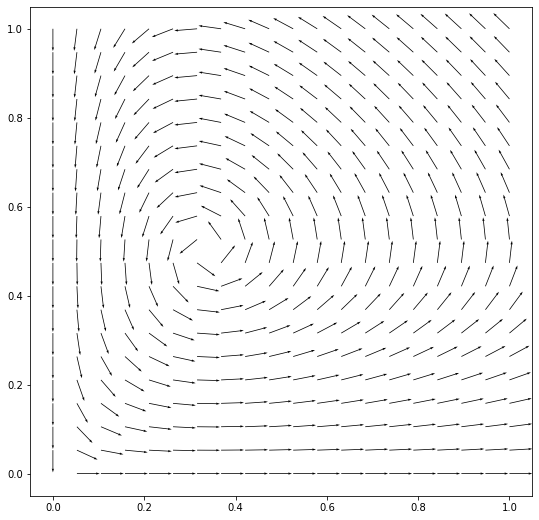

In [11]:
# Parameters for the Model
a = 2
b = 4
c = 3
d = 1

# Plot the Vector Field
fig1, ax1 = plt.subplots(1)
fig1.set_size_inches(9,9)

ax1 = plot_VectorField(vf, vg, ax1, right = 1, top = 1, scale=20, points = 20)

fig1.show()

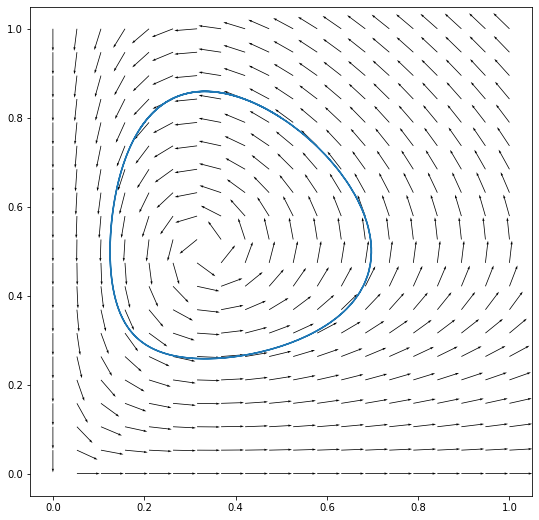

In [12]:
# Add Trajectory to the canvas.
ts = np.linspace(0,10, 200)
U0 = [.5, .8]  # Initial conditions (x0, y0)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
ys = Us[:,1]

ax1.plot(xs,ys)

fig1


## Revised Lotka Volterra
We saw, early in the semester, that it might be reasonable to add in a carrying capacity to a population to prevent exponential growth.  This produced the Logistic Growth Curve.

$$ \begin{cases}x' = x(a-ex) - b xy \\ y' = cxy - dy \end{cases}$$

Notice the addition of the $-ex^2$ term to the equation. For comparison, the Logistic Model is $$ P' = r P (1- P/K),$$
which is pretty much the same, just rearrange and relabel constants.

In [16]:
def f2(t, x, y):
  return x*(a-e*x) - b*x*y

def g2(t, x, y):
  return c*x*y - d*y

vf2 = np.vectorize(f2)
vg2 = np.vectorize(g2)

def dU_dt(U,t):
  x = U[0]
  y = U[1]
  xprime = f2(t, x, y)
  yprime = g2(t, x, y)
  return [xprime, yprime]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


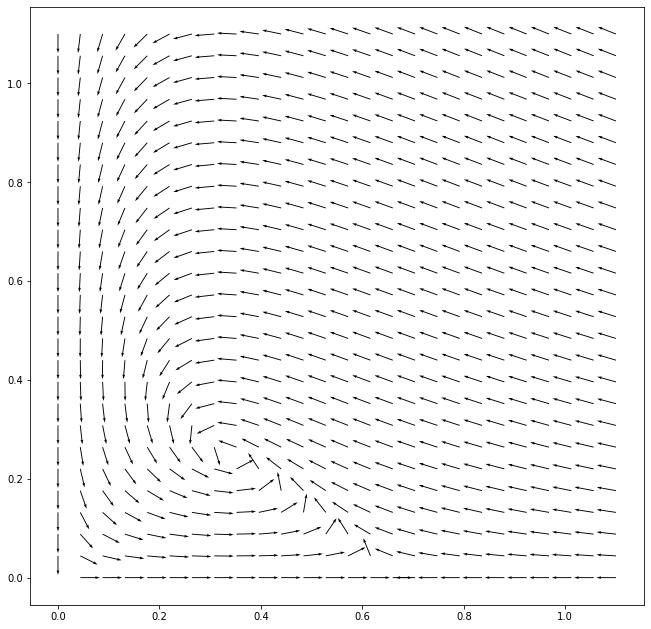

In [17]:
# Parameters for the Model
a = 2
b = 4
c = 3
d = 1
e = 3

# Plot the Vector Field
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(11, 11)

ax2 = plot_VectorField(vf2, vg2, ax2, right = 1.1, top = 1.1, scale = 26, points = 26)

fig2.show()

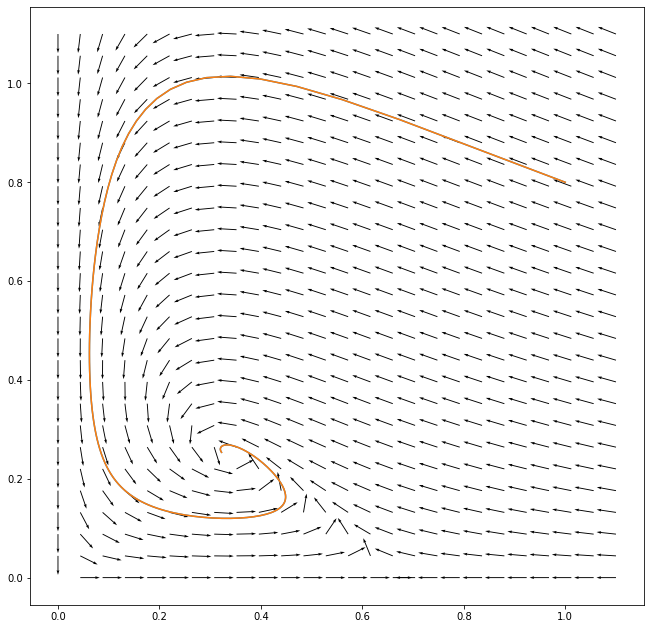

In [19]:
# Add Trajectory to the canvas.
ts = np.linspace(0,10, 200)
U0 = [1, .8]  # Initial conditions (x0, y0)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
ys = Us[:,1]

ax2.plot(xs,ys)

fig2